<font color = green>

##  CAT VS NONCAT DATA SET
    (variant 8) Ivanochko Viacheslav

</font>



<font color = green>

###  Load the data 

</font>



In [5]:
import h5py
import os
import numpy as np

path = 'data'

def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [7]:
X_train,y_train, X_test, y_test, classes = load_dataset()

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

Text(0.5, 1.0, "y = [0], it's a 'non-cat' picture.")

<Figure size 432x288 with 0 Axes>

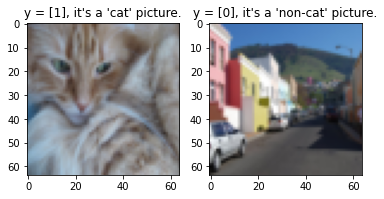

In [11]:
import matplotlib.pyplot as plt
index = 2
plt.figure()
_, xarrs = plt.subplots(1, 2)
xarrs[0].imshow(X_train[index] )

xarrs[1].imshow(X_train[index-1])
xarrs[0].set_title("y = " + str(y_train[index,:]) + ", it's a '" + classes[np.squeeze(y_train[index,:])] +  "' picture.")
xarrs[1].set_title("y = " + str(y_train[index-1,:]) + ", it's a '" + classes[np.squeeze(y_train[index-1,:])] +  "' picture.")

In [13]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

X_train_norm = sc.fit_transform(X_train_scaled)
X_test_norm = sc.fit_transform(X_test_scaled)

X_train_norm

array([[-1.11031618e+00, -9.84118601e-01, -4.09532700e-01, ...,
        -1.20650618e+00, -1.34172793e+00, -1.05231410e+00],
       [ 1.34624769e+00,  1.30374977e+00,  1.30231398e+00, ...,
        -4.32373805e-02, -1.18650240e-01,  1.69455696e-01],
       [-2.18267844e-01, -4.15704099e-01, -2.56232997e-01, ...,
         7.51190095e-01,  8.13946499e-01,  1.08955394e+00],
       ...,
       [ 6.18885207e-01,  7.77966356e-01,  9.82939603e-01, ...,
        -6.78765786e-04,  2.94138481e-01,  1.19513898e+00],
       [-1.04169707e+00, -1.08359114e+00, -8.31106883e-01, ...,
        -1.14976136e+00, -1.26528558e+00, -1.05231410e+00],
       [-1.23383056e+00, -1.02674969e+00, -4.47857625e-01, ...,
        -1.20650618e+00, -1.34172793e+00, -1.05231410e+00]])

In [59]:
import numpy as np

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)
print ('Y_train.shape=', y_train.shape)
print ('Y_test.shape=', y_test.shape)
print ('X_train_norm.shape=', X_train_norm.shape)

Y_train.shape= (209,)
Y_test.shape= (50,)
X_train_norm.shape= (209, 12288)


<font color = green>

###  YOUR CODE FOR 1,2 and 3-LAYERS MLP CLASSIFIER
</font>



<font color = green>

###  One layer MLP CLASSIFIER
</font>

In [60]:
from sklearn.neural_network import MLPClassifier

# one layer MPL Classifier
clf = MLPClassifier(solver='adam', activation='relu', max_iter=500)
clf.fit(X_train_norm, y_train)

print("One layer train accuracy= {:.3%}".format(clf.score (X_train_norm,y_train)))
print("One layer test accuracy= {:.3%}".format(clf.score (X_test_norm,y_test)))

One layer train accuracy= 100.000%
One layer test accuracy= 66.000%


<font color = green>

###  Two layers MLP CLASSIFIER
</font>

In [61]:
"""
    Cause it is not posible to set different activation functions for different
    hidden layers just choose activation function with best accuracy
"""

for activation in ['identity', 'relu']:
    clf = MLPClassifier((3,3), solver='adam', activation=activation, max_iter=500)
    clf.fit(X_train_norm, y_train)
    
    print(f"\n{activation}")
    print("Two layers train accuracy= {:.3%}".format(clf.score (X_train_norm,y_train)))
    print("Two layers test accuracy= {:.3%}".format(clf.score (X_test_norm,y_test)))
    print("-" * 20)


identity
Two layers train accuracy= 100.000%
Two layers test accuracy= 62.000%
--------------------

relu
Two layers train accuracy= 98.086%
Two layers test accuracy= 66.000%
--------------------


C:\Users\geral\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<font color = green>

###  Three layers MLP CLASSIFIER
</font>

In [63]:
"""
    Cause it is not posible to set different activation functions for different
    hidden layers just choose activation function with best accuracy
"""

for activation in ['identity', 'relu']:
    clf = MLPClassifier((20,7,10), solver='adam', activation=activation, max_iter=500)
    clf.fit(X_train_norm, y_train)
    
    print(f"\n{activation}")
    print("three layers train accuracy= {:.3%}".format(clf.score (X_train_norm,y_train)))
    print("three layers test accuracy= {:.3%}".format(clf.score (X_test_norm,y_test)))
    print("-" * 20)


identity
three layers train accuracy= 100.000%
three layers test accuracy= 58.000%
--------------------

relu
three layers train accuracy= 97.129%
three layers test accuracy= 64.000%
--------------------


### Compare with SVM 

In [38]:
from sklearn.svm import SVC

In [64]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_norm, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_norm, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_norm, y_test)))

train accuracy= 100.000%
test accuracy= 36.000%
